In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
# Load the Iris dataset
df = px.data.iris()

## Scale the data before clustering

In [ ]:

#df = px.data.iris()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaled_numerical_features = scaler.fit_transform(df[numerical_cols])
df_scaled_numerical = pd.DataFrame(scaled_numerical_features, columns=numerical_cols, index=df.index)

df = pd.concat([df_scaled_numerical, df['species']], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,petal_sepal_length_ratio,species
0,-0.900681,1.032057,-1.341272,-1.312977,-1.434116,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,-1.387365,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,-1.425412,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,-1.218908,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,-1.411208,setosa
...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,0.658865,virginica
146,0.553333,-1.281972,0.705893,0.922064,0.732015,virginica
147,0.795669,-0.124958,0.819624,1.053537,0.758508,virginica
148,0.432165,0.800654,0.933356,1.447956,1.054623,virginica


# Logistic Regression

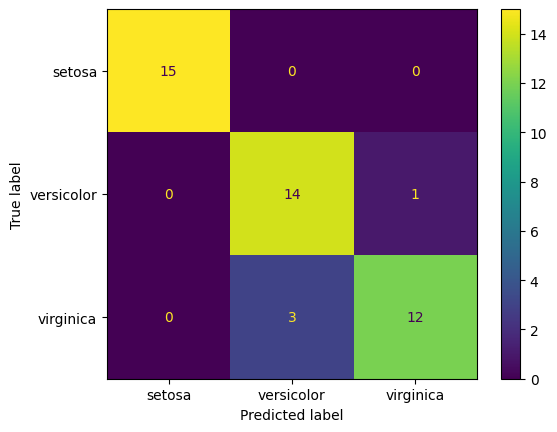

Logistic Regression:
Precision: 0.9155354449472096
Recall: 0.9111111111111111
Accuracy: 0.9111111111111111


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Split data into features and target
y = df['species']
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# split the data randomly into 75% train and 25% test samples
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 42)

# standard scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Make a logistic model to classify
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Use the trained model to predict testing data
y_pred_prob = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

# Evulate model
classifier_precision = precision_score(y_test, y_pred, average='weighted')
classifier_recall = recall_score(y_test, y_pred, average='weighted')
classifier_accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression:")
print("Precision:", classifier_precision)
print("Recall:", classifier_recall)
print("Accuracy:", classifier_accuracy)


# CART Model

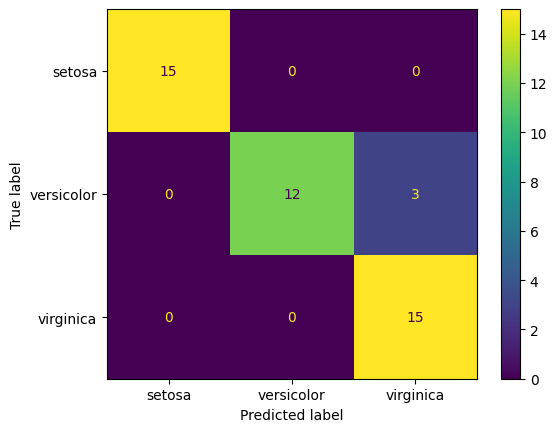

Metrics of the decision tree model:
Precision: 0.9444444444444444
Recall: 0.9333333333333333
Accuracy: 0.9333333333333333


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# DecisionTreeClassifier
class_threshold = 0.5
cart_model = DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)

# Fit the model on the training data
cart_model.fit(X_train, y_train)

# Make predictions on the test data
cart_predictions = cart_model.predict(X_test)

# Predict probabilities
y_pred_prob = cart_model.predict_proba(X_test)[:, 1]

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, cart_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cart_model.classes_)
disp.plot()
plt.show()

# Metrics of the decision tree model
print('Metrics of the decision tree model:')
print("Precision:", precision_score(y_test, cart_predictions, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, cart_predictions, average='weighted', zero_division=0))
print("Accuracy:", accuracy_score(y_test, cart_predictions))


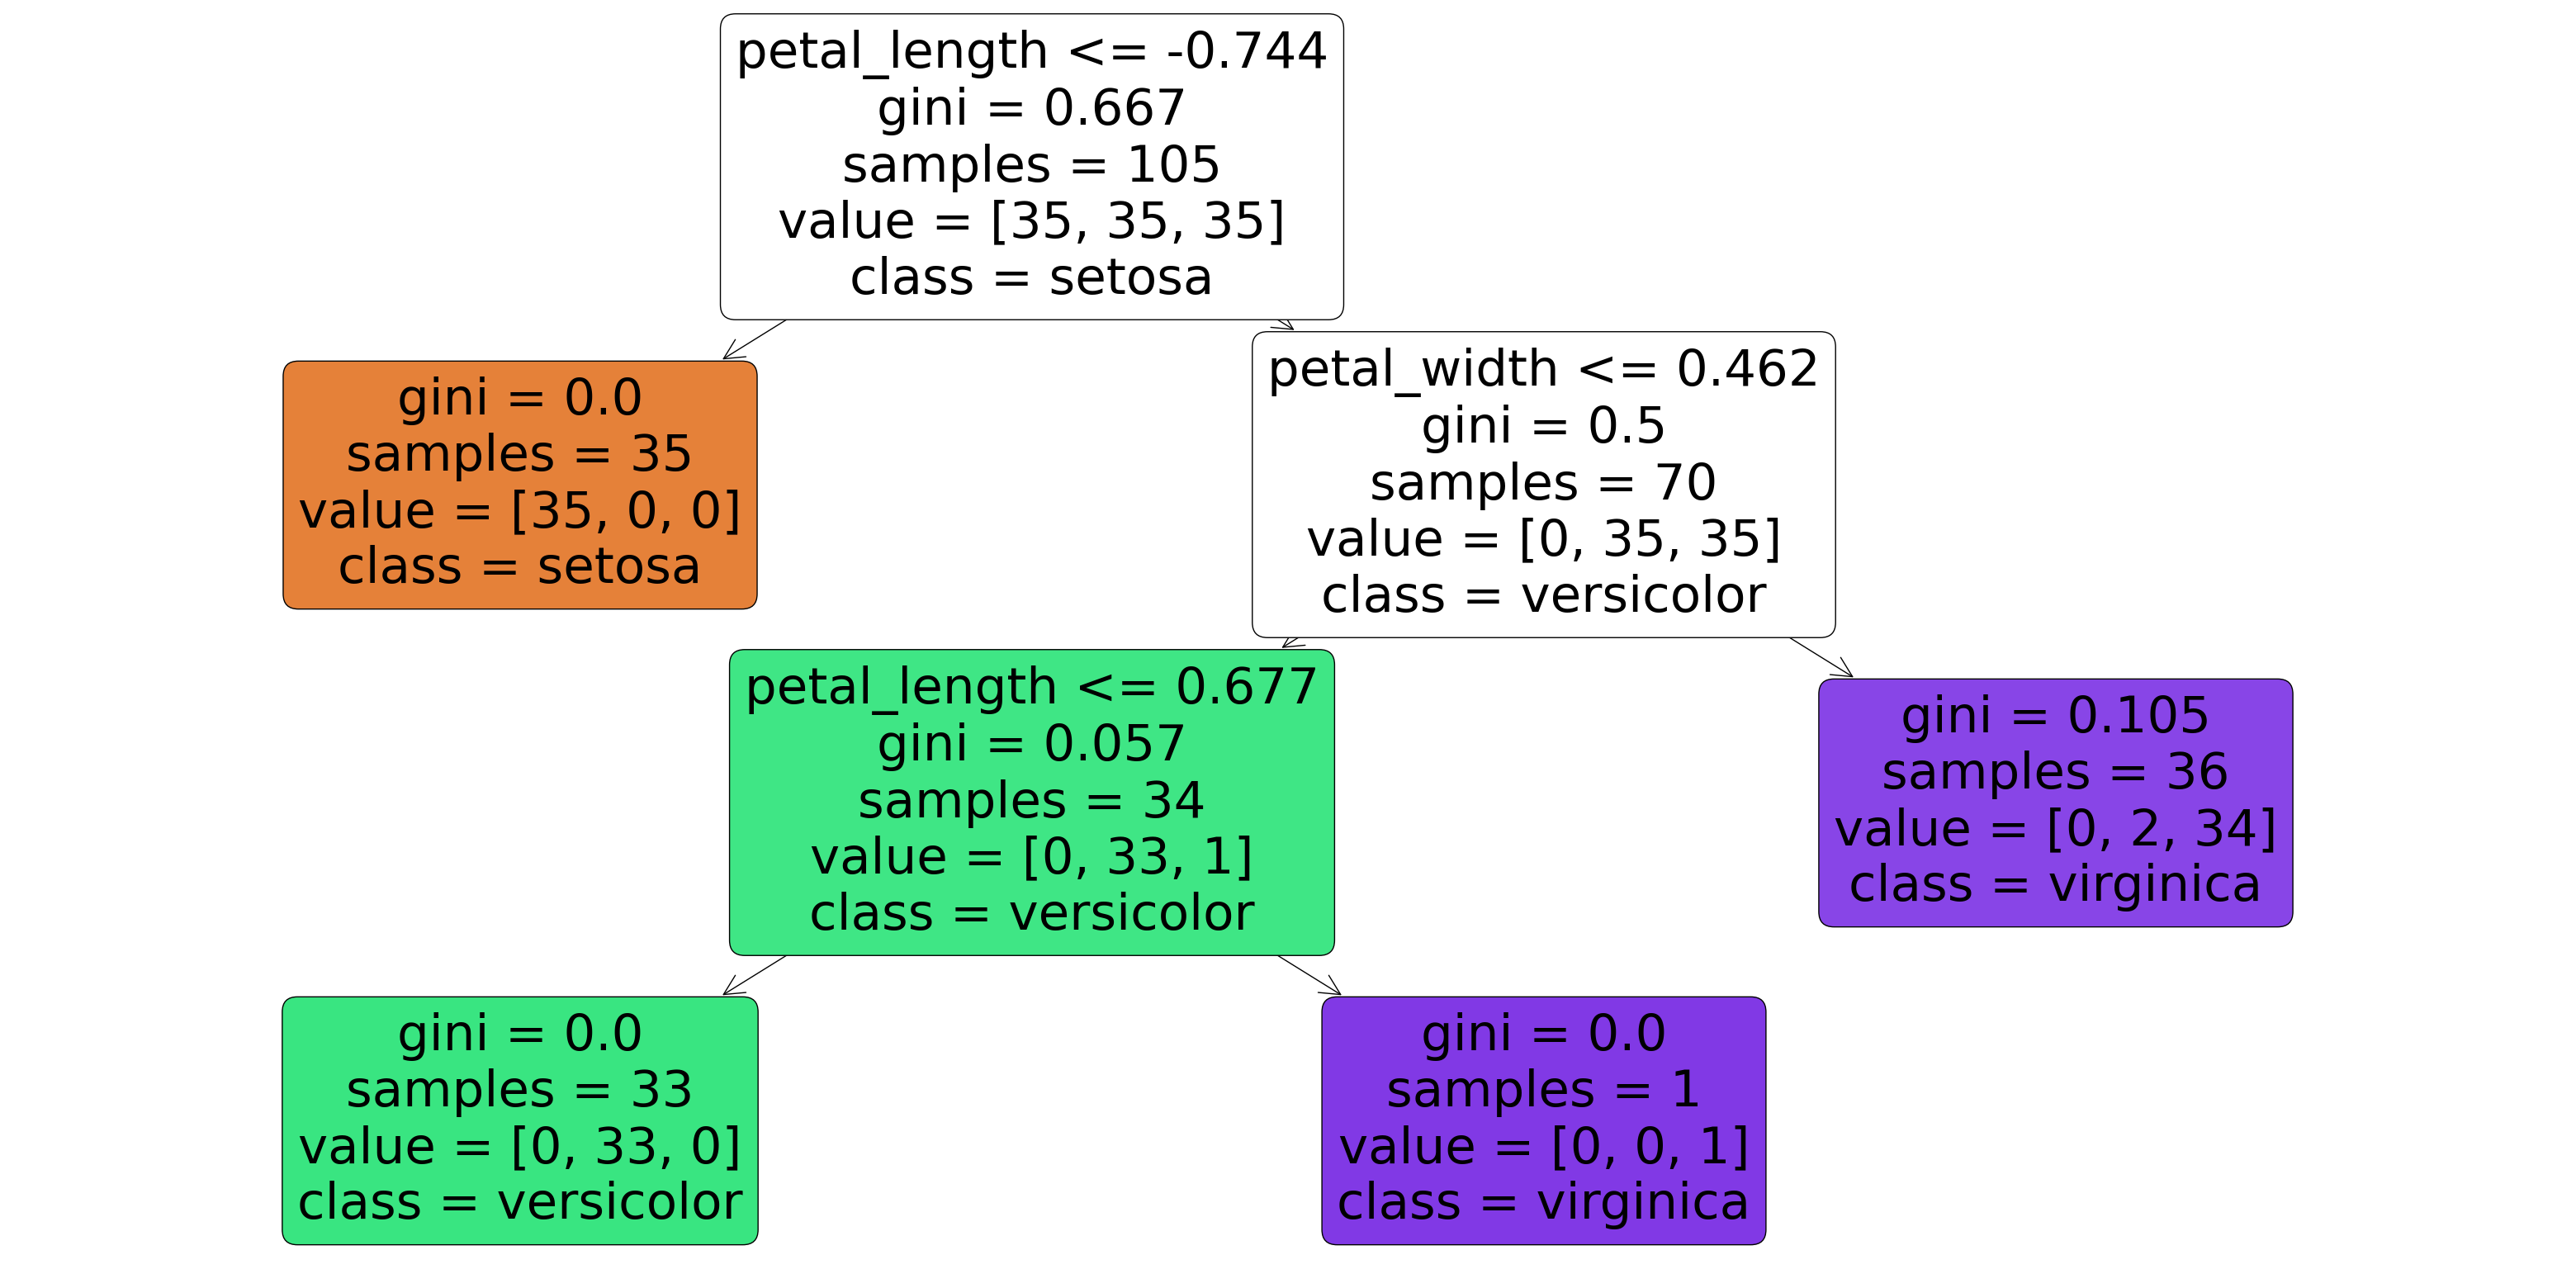

CART tree


In [ ]:
# Visualizing the resultant tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(40, 20))
tree.plot_tree(cart_model, feature_names=df.columns[:-1], class_names=df['species'].unique(), filled=True, rounded=True)
plt.show()
print('CART tree')

# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_train_k = scaler.fit_transform(X_train)
X_test_k = scaler.transform(X_test)

# df1 = df.drop('species', axis=1)

### Determine the optimal number of clusters using the Elbow Method

In [ ]:
wcss = []  # Within-cluster sum of square


# Loop through different numbers of clusters and save the within cluster sum of squares for each number
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 10, random_state=42)
    kmeans.fit(X_train_k)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method result
px.line(x=range(1, 11), y=wcss, labels={'x': 'Number of Clusters', 'y': 'WCSS'}, title='Elbow Method', width = 800).show()

In [ ]:
# Perform K-means clustering with the optimal number of clusters
feature_columns = df.drop(['species', 'species_id'], axis=1).columns
X_train_df = pd.DataFrame(X_train_k, columns=feature_columns)

kmeans = KMeans(n_clusters=3, init='k-means++', n_init = 10, random_state=42)
y_kmeans = kmeans.fit_predict(X_train_df)
label_mapping = {'setosa':1, 'versicolor':2, 'virginica':0}
# Apply the mapping to y_train
y_train_mapped = [label_mapping[label] for label in y_train]
print(y_kmeans.tolist())
print(y_train_mapped)
X_train_df['Cluster'] = y_kmeans.astype(object)

[2, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1]
[2, 2, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1]


## Centroids & head map

In [ ]:
# Accessing the cluster means (centroids)
centroids = kmeans.cluster_centers_

# Creating a DataFrame for better legibility
centroids_df = pd.DataFrame(centroids, columns=pd.DataFrame(X_train).columns)
centroids_df.index.name = 'Cluster'
centroids_df.reset_index(inplace=True)
centroids_df['Cluster'] += 1  # Adjusting index to start from 1 for better readability
print(centroids_df)


   Cluster  sepal_length  sepal_width  petal_length  petal_width
0        1      1.263694     0.201157      1.088624     1.079318
1        2     -1.030204     0.798743     -1.294688    -1.248323
2        3     -0.014389    -0.824136      0.335219     0.302221


In [ ]:
# Create the heatmap
fig = go.Figure(data=go.Heatmap(
                   z=centroids_df.drop('Cluster', axis=1).values,  # Heatmap values
                   x=centroids_df.drop('Cluster', axis=1).columns,  # Column labels
                   y=centroids_df['Cluster'],  # Row labels
                   text=centroids_df.drop('Cluster', axis=1).values.astype(str),
                   colorscale='Viridis'))  # Color scale


# Modify the layout to adjust y-axis ticks
fig.update_layout(
    yaxis=dict(
        tickmode='array',
        tickvals=centroids_df['Cluster'],  # Positions where ticks should be displayed
        ticktext=centroids_df['Cluster'].astype(str)  # Text labels for each tick
    )
)

# Adding annotations for each value
for i, row in enumerate(centroids_df.drop('Cluster', axis=1).values):
    for j, value in enumerate(row):
        fig.add_annotation(x=j, y=i+1, text=f"{value:.2f}",
                           showarrow=False, font=dict(color="white", size=16))


# Adding layout titles
fig.update_layout(title='Heatmap of Cluster Centroids', xaxis_title='Features', yaxis_title='Clusters')

# Show the figure
fig.show()

## Visualize the clustering result

In [ ]:
X_train_df

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,-0.900459,-1.218136,-0.442835,-0.135153,2
1,0.380366,-1.881999,0.402577,0.380886,2
2,-0.900459,1.658604,-1.288246,-1.167231,1
3,1.078998,0.330878,1.191628,1.412964,0
4,-0.201827,-0.554273,0.177134,0.122866,2
...,...,...,...,...,...
100,-1.133336,0.109590,-1.288246,-1.425251,1
101,-0.201827,-0.996848,-0.161031,-0.264163,2
102,-0.434704,2.543754,-1.344607,-1.296241,1
103,-0.318266,-0.775561,0.233495,0.122866,2


In [ ]:
# Visualize clusters with the cluster labels

fig_kmeans = px.scatter(X_train_df, x='petal_length', y='petal_width', color='Cluster', title='Iris Dataset K-Means Clustering', color_discrete_map={1: 'blue', 0: 'red', 2: 'green'})
fig_kmeans.show()

In [ ]:
# Visualize clusters with true species labels

fig_species = px.scatter(df, x='petal_length', y='petal_width',  color='species', title='Iris Dataset by True Species Labels', color_discrete_map={
    'setosa': 'blue',
    'versicolor': 'green',
    'virginica': 'red'
})
fig_species.show()

## Compare the clustering results and original classification side-by-side

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a subplot figure
fig = make_subplots(rows=1, cols=2, subplot_titles=('Iris Dataset K-Means Clustering', 'Iris Dataset by True Species Labels'))

# Add traces from the first Plotly Express figure to the subplot
for trace in fig_kmeans.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from the second Plotly Express figure to the subplot
for trace in fig_species.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout if needed
fig.update_layout(height=600, width=1200, title_text="Iris Dataset Analysis")
fig.show()

## Confusion Matrix

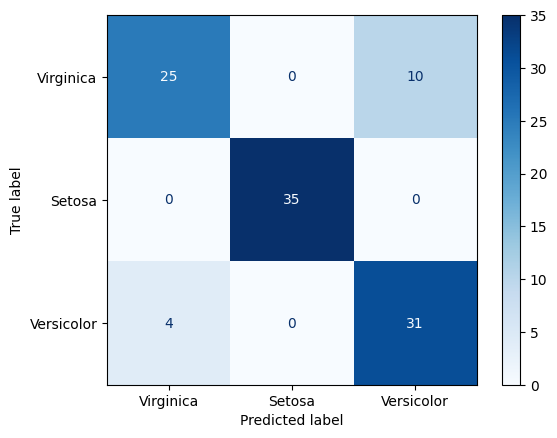

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inverse mapping from numerical labels to species names
inverse_label_mapping = {1: 'Setosa', 2: 'Versicolor', 0: 'Virginica'}

y_test_mapped = [label_mapping[label] for label in y_test]

conf_matrix = confusion_matrix(y_train_mapped, y_kmeans)
display_labels = [inverse_label_mapping[label] for label in sorted(inverse_label_mapping.keys())]

# Create the ConfusionMatrixDisplay instance with the confusion matrix and custom display labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)

# Plot the confusion matrix with species names as labels
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Evaluation

In [ ]:
# Evaluate
y_test_mapped = [label_mapping[label] for label in y_test]
accuracy_kmeans = accuracy_score(y_test_mapped, kmeans.predict(X_test))
precision_kmeans = precision_score(y_test_mapped, kmeans.predict(X_test), average='macro', zero_division=0)
recall_kmeans = recall_score(y_test_mapped, kmeans.predict(X_test), average='macro')

print("Accuracy: ", round(accuracy_kmeans, 4)*100, "%")
print("Precision: ", round(precision_kmeans, 4)*100, "%")
print("Recall: ", round(recall_kmeans, 4)*100, "%")

Accuracy:  75.56 %
Precision:  75.92999999999999 %
Recall:  75.56 %


# Hierarchical Clustering


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the Iris dataset
df = px.data.iris()
df1 = df.drop('species', axis=1)

In [ ]:
dist_single = linkage(df1,method="single")
dist_complete = linkage(df1,method="complete")
dist_average = linkage(df1,method="average")

# Create a dendrogram using Plotly
fig_single = ff.create_dendrogram(dist_single, orientation='bottom')

# Update layout of the figure
fig_single.update_layout(width=1600, height=600, title='Hierarchical Clustering Dendrogram using Single Linkage')
fig_single.show()

# Create two more dendrograms for other linkage methods
fig_complete = ff.create_dendrogram(dist_complete, orientation='bottom')
fig_average = ff.create_dendrogram(dist_average, orientation='bottom')


df['cluster_hc_single'] = fcluster(dist_single, t=3, criterion='maxclust').astype(object)
df['cluster_hc_average'] = fcluster(dist_average, t=3, criterion='maxclust').astype(object)
df['cluster_hc_complete'] = fcluster(dist_complete, t=3, criterion='maxclust').astype(object)

fig_hc_single = px.scatter(df, x='petal_length', y='petal_width', color='cluster_hc_single', title='Iris Dataset Hierarchical Clustering', color_discrete_map={1: 'blue', 3: 'green', 2: 'red'})
fig_hc_average = px.scatter(df, x='petal_length', y='petal_width', color='cluster_hc_average', title='Iris Dataset Hierarchical Clustering', color_discrete_map={1: 'blue', 3: 'green', 2: 'red'})
fig_hc_complete = px.scatter(df, x='petal_length', y='petal_width', color='cluster_hc_complete', title='Iris Dataset Hierarchical Clustering', color_discrete_map={1: 'blue', 3: 'green', 2: 'red'})
fig_hc_single.show()
fig_hc_average.show()
fig_hc_complete.show()

# Create a subplot figure
fig = make_subplots(rows=1, cols=2, subplot_titles=('Iris Dataset Hierarchical Clustering', 'Iris Dataset by True Species Labels'))
fig_species = px.scatter(df, x='petal_length', y='petal_width',  color='species', title='Iris Dataset by True Species Labels', color_discrete_map={
    'setosa': 'blue',
    'versicolor': 'green',
    'virginica': 'red'
})
# Add traces from the first Plotly Express figure to the subplot
for trace in fig_hc_complete.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from the second Plotly Express figure to the subplot
for trace in fig_species.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout if needed
fig.update_layout(height=600, width=1200, title_text="Iris Dataset Analysis")
fig.show()



In [ ]:
species_map={'setosa':'1','versicolor':'3','virginica':'2'}
df['species_numerical']=df['species'].map(species_map)

species_map={'setosa':'1','versicolor':'2','virginica':'3'}
df['species_numerical_single']=df['species'].map(species_map)



In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id,cluster_hc_single,cluster_hc_average,cluster_hc_complete,species_numerical,species_numerical_single
0,5.1,3.5,1.4,0.2,setosa,1,1,1,1,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1,1,1,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1,1,1,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1,1,1,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3,3,2,2,2,3
146,6.3,2.5,5.0,1.9,virginica,3,3,2,3,2,3
147,6.5,3.0,5.2,2.0,virginica,3,3,2,2,2,3
148,6.2,3.4,5.4,2.3,virginica,3,3,2,2,2,3


# Evaluation

In [ ]:
print("\n\n HC Single : \n\n")
# True labels
true_labels = df['species_numerical_single'].astype(int).tolist()  # Convert to Python list of integers

# Predicted labels
predicted_labels = df['cluster_hc_single'].astype(int).tolist()  # Convert to Python list of integers

print("True Labels: ", true_labels)
print("Predictions: ", predicted_labels)

# Calculate accuracy
correct_predictions = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
accuracy = correct_predictions / len(true_labels)

print("Correct Predictions:", correct_predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

print("\n\n HC Average : \n\n")
# True labels
true_labels = df['species_numerical'].astype(int).tolist()  # Convert to Python list of integers

# Predicted labels
predicted_labels = df['cluster_hc_average'].astype(int).tolist()  # Convert to Python list of integers

print("True Labels: ", true_labels)
print("Predictions: ", predicted_labels)

# Calculate accuracy
correct_predictions = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
accuracy = correct_predictions / len(true_labels)

print("Correct Predictions:", correct_predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

print("\n\n HC Complete : \n\n")
# True labels
true_labels = df['species_numerical'].astype(int).tolist()  # Convert to Python list of integers

# Predicted labels
predicted_labels = df['cluster_hc_complete'].astype(int).tolist()  # Convert to Python list of integers

print("True Labels: ", true_labels)
print("Predictions: ", predicted_labels)

# Calculate accuracy
correct_predictions = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
accuracy = correct_predictions / len(true_labels)

print("Correct Predictions:", correct_predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)



 HC Single : 


True Labels:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Predictions:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Correct Predictions: 150
Accuracy: 1.0
Precision: 1.